In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

U是一個mxm的正交矩陣，被稱為左奇異向量，方陣裡面的向量是正交的  
Σ是一個mxn的對角矩陣，除了對角線的元素其他都是0，對角線上的值稱為奇異值    
V'是一個nxn的正交矩陣，被稱為右奇異向量，方陣裡面的向量也都是正交的

(525, 1200, 3)


,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9,Sample 10,...,Sample 27,Sample 28,Sample 29,Sample 30,Sample 31,Sample 32,Sample 33,Sample 34,Sample 35,Sample 36
Feature 1,5.463345,4.123040,3.924469,3.750348,3.333183,3.052654,1.948405,1.955538,1.978302,5.034613,...,1.813648,1.903255,5.369706,3.192060,3.829600,3.779146,1.178978,1.607610,4.809965,1.087589
Feature 2,1.286450,1.739862,8.065933,0.824014,1.893682,1.824052,5.707203,11.807556,1.773287,1.727141,...,1.732903,1.931769,8.789740,1.498628,3.424533,2.763072,1.619473,2.881423,1.026672,0.278138
Feature 3,5.664706,5.156360,7.928177,5.422891,1.667389,8.536632,3.192773,0.136734,3.391257,6.861763,...,1.666534,1.122411,1.113091,1.210351,16.332331,7.502309,5.794182,2.080349,5.463495,1.114639
Feature 4,0.848460,0.389817,0.615376,1.431415,1.166602,1.274965,0.507419,0.719238,0.239851,0.327527,...,0.636568,0.855230,0.177424,0.243861,0.743163,0.508197,1.094406,0.470588,1.277693,0.338820
Feature 5,0.112691,1.147955,0.654597,0.006620,0.187143,0.571042,0.019762,0.091990,0.248482,0.735456,...,0.067293,0.138438,0.286897,0.229669,0.132514,0.013675,0.328811,0.494854,0.922559,0.156702


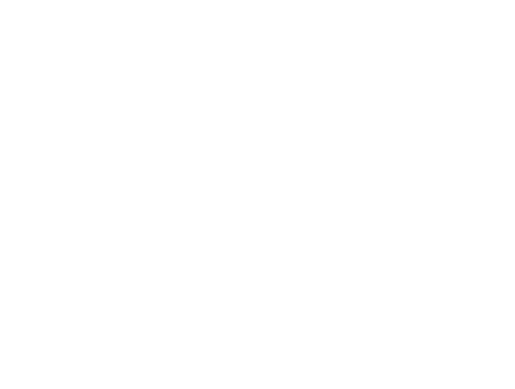

In [ ]:
work_dir = "/content/drive/MyDrive/生醫資訊基礎/1202/"
img_path = 'pkthink-about-picture.jpg'
excel_path = '20231204 HwData.xlsx'

os.chdir(work_dir)
img = plt.imread(img_path)
plt.axis('off')

print(img.shape)
df = pd.read_excel(excel_path, index_col=0)
df.head()

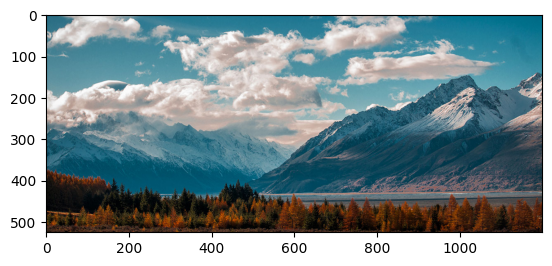

In [ ]:
# 原始圖片
plt.imshow(img, cmap="gray")

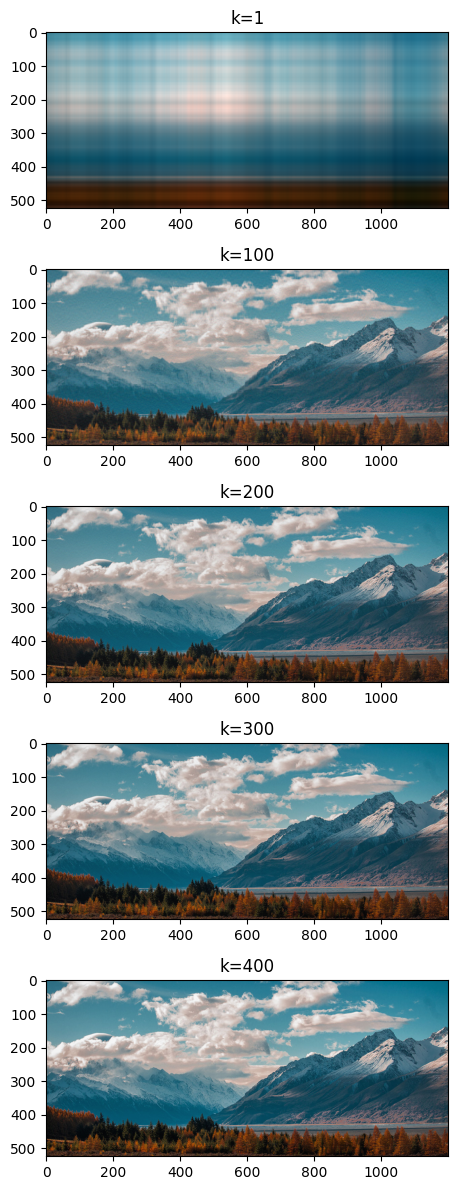

In [18]:
def SVD(A, k):
    assert k < A.shape[0]

    # 計算Matrix 的SVD結果
    U, S, V_t = np.linalg.svd(A,  full_matrices=True)

    # 對SVD結果進行壓縮)
    U_com = U[:, :k]
    S_com = np.diag(S[:k])
    V_T_com = V_t[:k, :]

    #輸出壓縮後的結果
    Result = U_com @ S_com @ V_T_com

    return Result, (U_com, S_com, V_T_com)

def compress_img(img, k):

    img_list = []
    for color_ind in range(3):
        c_img = np.array(img[:, :, color_ind])
        compressed_c_img, _ = SVD(c_img, k)
        img_list.append(compressed_c_img)

    compressed_img = np.stack(img_list, axis=2)

    # 採用不同的normalize方式
    compressed_img = (compressed_img - compressed_img.min()) / (compressed_img.max() - compressed_img.min())

    return compressed_img

# 1. 不同k值下的壓縮圖片
fig, axs = plt.subplots(5, 1, figsize=(8, 12))

for i, k in enumerate([1] + list(range(100, 401, 100))):
    compressed_img = compress_img(img, k)
    axs[i].imshow(compressed_img)
    axs[i].set_title(f'k={k}')

plt.tight_layout()
plt.show()

In [39]:
# is a unit vector
data = df
U, S, Vt = np.linalg.svd(df, full_matrices=False)
eigen_feature = Vt[0, :]
print(f"The first eigen-feature is a unit vector: {np.isclose(np.linalg.norm(eigen_feature), 1.0)}")

The first eigen-feature is a unit vector: True


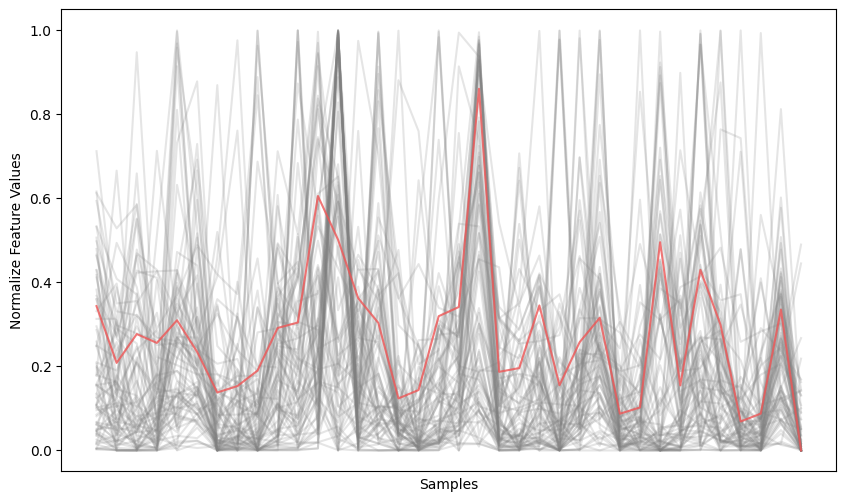

In [40]:
def normalize(row):
    return (row - row.min())/row.max()

plt.figure(figsize=(10, 6))
for feature in df.index:
    plt.plot(normalize(df.loc[feature, :]), label=f'Feature {feature}', alpha=0.2, color="gray")
plt.plot(normalize(-eigen_feature), label='Eigen-feature', color="#EE5555", linewidth=1.5, alpha=0.8)

plt.xlabel('Samples')
plt.xticks([])  # Hide x-axis labels
plt.ylabel('Normalize Feature Values')
plt.show()
